<a href="https://colab.research.google.com/github/Jose-AE/TC1002S/blob/main/Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Actividad: Mapas de calor y boxplots

### Osmar Araico Gonzalez-A01664590
### Jose Luis Almeida Esparza-A01028493

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/content/covid19_tweets.csv")
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [7]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,user_followers,user_friends,user_favourites,user_verified,is_retweet
user_followers,1.000000,-0.002722,-0.028724,0.322896,NaN
user_friends,-0.002722,1.000000,0.207825,0.013099,NaN
user_favourites,-0.028724,0.207825,1.000000,-0.060316,NaN
user_verified,0.322896,0.013099,-0.060316,1.000000,NaN
is_retweet,NaN,NaN,NaN,NaN,NaN


In [8]:
df = pd.DataFrame(
    pd.read_csv("/content/covid19_tweets.csv")[["user_followers", "user_friends"]]
)

df.head()

,user_followers,user_friends
0,624,950
1,2253,1677
2,9275,9525
3,197,987
4,101009,168


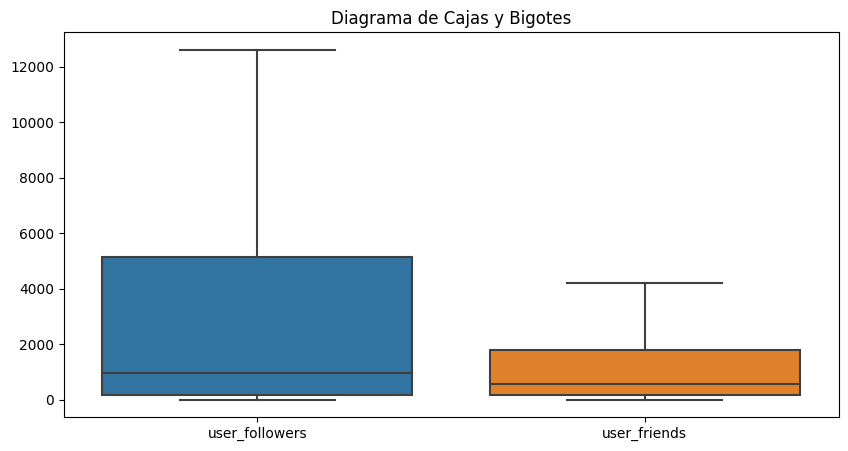

In [9]:
# Diagrama de cajas y bigotes
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, orient="vertical", showfliers=False)
plt.title("Diagrama de Cajas y Bigotes")
plt.show()

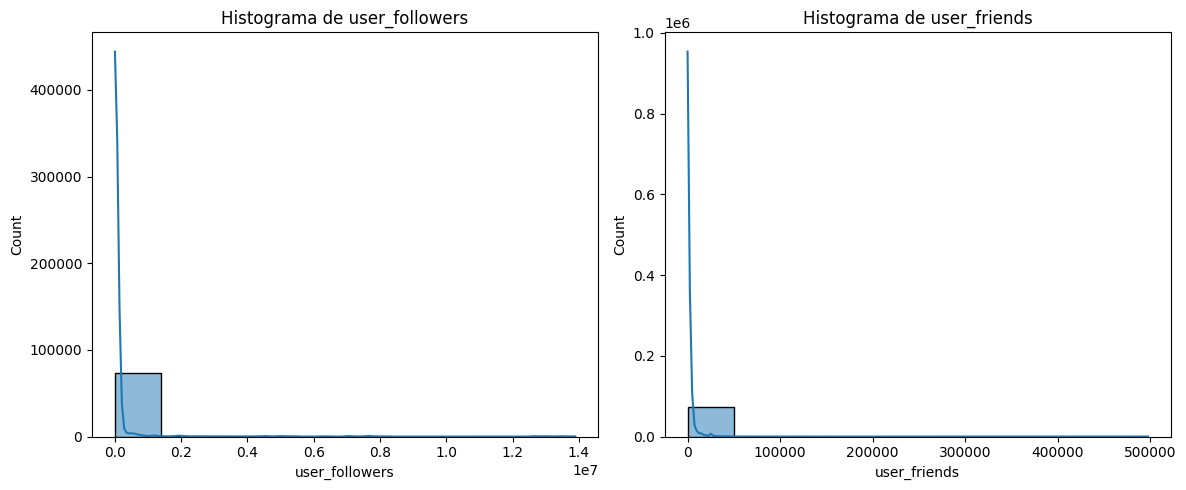

In [10]:
# Histogramas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["user_followers"], bins=10, kde=True)
plt.title("Histograma de user_followers")

plt.subplot(1, 2, 2)
sns.histplot(df["user_friends"], bins=10, kde=True)
plt.title("Histograma de user_friends")

plt.tight_layout()
plt.show()

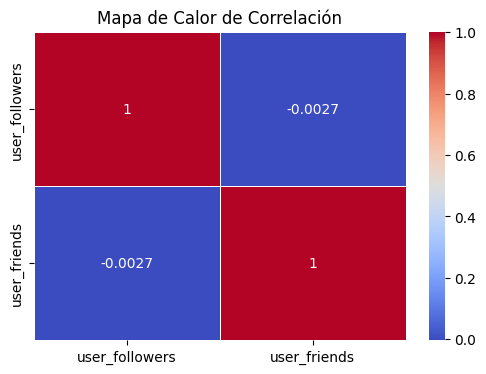

In [11]:
# Mapa de calor de la correlación
correlation_matrix = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

###¿Hay alguna variable que no aporta información?
Sí, desde nuestro punto de vista, la variable user_name no parece aportar información significativa. Lo mismo sucede con la variable is_tweet.

### Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
Eliminaría "is_retweet" y "variable_user" por su falta de correlación.

### ¿Existen variables que tengan datos extraños?
Sí, las variables user_friends, user_followers y user_favourites tienen outliers

### ¿Las variables están en rangos similares? ¿Esto afecta?

No, las variables tienen rangos distintos y esto puede afectar a los modelos.

### ¿Puedes encontrar grupos que se parezcan?

Sí, según el análisis k-means previo y las distribuciones de las variables estudiadas en esta actividad, se distinguen dos grupos: uno con pocos amigos y seguidores y otro con pocos amigos pero muchos seguidores.